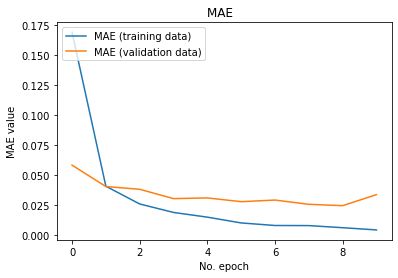

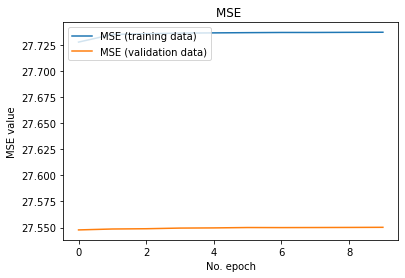

Text(0, 0.5, 'accuracy')

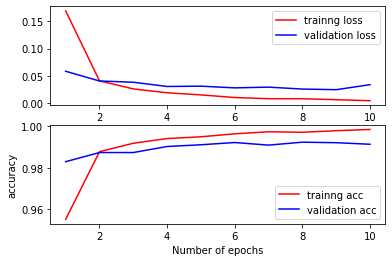

In [18]:
import numpy as np # linear algebra
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

train=pd.read_csv('/content/drive/My Drive/train.csv')
test=pd.read_csv('/content/drive/My Drive/test.csv')

Y_train=train.label

train_label=train.label
test_new_label=test.id

train_new=train.drop(['label'], axis=1).values/255
test_new=test.drop(['id'],axis=1).values/255

test_new_X=test_new.reshape( test_new.shape[0], 28, 28,1) 


X_train, X_test, Y_train, Y_test = train_test_split( train_new, train.label, test_size=0.2)

X_train = X_train.reshape( X_train.shape[0], 28, 28,1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)


batch_size=100

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), padding='same', activation=tf.nn.relu, input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (2,2), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',  metrics=['mean_squared_error','mae','accuracy'])


history=model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test),batch_size=100,shuffle=True, verbose=0)


epochs=10 
# Plot history: MAE
plt.plot(history.history['loss'], label='MAE (training data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('MAE  ')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()


# Plot history: MSE
plt.plot(history.history['mean_squared_error'], label='MSE (training data)')
plt.plot(history.history['val_mean_squared_error'], label='MSE (validation data)')
plt.title('MSE ')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()


fig,ax=plt.subplots(2,1)
fig.set
x=range(1,1+epochs)
ax[0].plot(x,history.history['loss'],color='red')
ax[0].plot(x,history.history['val_loss'],color='blue')
ax[1].plot(x,history.history['accuracy'],color='red')
ax[1].plot(x,history.history['val_accuracy'],color='blue')
ax[0].legend(['trainng loss','validation loss'])
ax[1].legend(['trainng acc','validation acc'])
plt.xlabel('Number of epochs')
plt.ylabel('accuracy')